<a href="https://colab.research.google.com/github/LuisMantilla28/Regresion/blob/main/Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving natalidad.csv to natalidad.csv


In [10]:
import pandas as pd
import io
tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";")
tabla.head(3)

<ipython-input-10-27fefab69396>:3: DtypeWarning: Columns (4,14,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla = pd.read_csv(io.BytesIO(uploaded['natalidad.csv']), sep = ";")


,id,areanac,cod_insp,sit_parto,otro_sit,nom_inst,cod_inst,sexo,peso_nac,talla_nac,...,n_emb,seg_social,idclasadmi,nomclasad,codclasad,edad_padre,niv_edup,ultcurpad,barrio_res,comuna_res
0,1,1,NaN,1,NaN,PROMOTORA MEDICA LAS AMERICAS S.A,5.001021e+10,2,1070,38,...,4,1,1.0,COOMEVA E.P.S. S.A.,EPS016,42,4,11,El Rincón,16 Belen
1,2,1,NaN,1,NaN,CLINICA DEL PRADO S.A.,5.001046e+10,2,2900,47,...,1,1,1.0,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,EPS002,25,99,9,Versalles N.2,03 Manrique
2,3,1,NaN,1,NaN,CLINICA UNIVERSITARIA BOLIVARIANA,5.001034e+10,2,2510,48,...,2,5,NaN,NaN,NaN,34,8,3,Santa Mónica,12 La America


Tres variables sobre las cuáles se tiene interés corresponden a peso del recién nacido (en Kg), edad en años de la madre y tiempo de gestación en semanas. Se quiere determinar si el peso de un bebé recién nacido aumenta a medida que lo hacen tanto el tiempo de gestación y la edad de la madre durante el embarazo.

In [11]:
X, Y, Z = tabla["peso_nac"], tabla["t_ges"], tabla["edad_madre"]  # La variable regresora, la variable respuesta
print(X.head(3))
print(Y.head(3))
print(Z.head(3))

0    1070
1    2900
2    2510
Name: peso_nac, dtype: int64
0    30
1    40
2    36
Name: t_ges, dtype: int64
0    39
1    21
2    37
Name: edad_madre, dtype: int64


Notemos que hay datos atípicos (en realidad ilógicos porque un bebé recién nacido no puede pesar más de 6 kilos y su madre no puede tener más de 80 años) los cuáles se hace necesario eliminar

In [12]:
sin_atipicos = tabla[(tabla["peso_nac"] < 6000) & (tabla["t_ges"] < 50)]
print(sin_atipicos.head())


   id  areanac  cod_insp  sit_parto otro_sit  \
0   1        1       NaN          1      NaN   
1   2        1       NaN          1      NaN   
2   3        1       NaN          1      NaN   
3   4        1       NaN          1      NaN   
4   5        1       NaN          1      NaN   

                                            nom_inst      cod_inst  sexo  \
0                  PROMOTORA MEDICA LAS AMERICAS S.A  5.001021e+10     2   
1                             CLINICA DEL PRADO S.A.  5.001046e+10     2   
2                  CLINICA UNIVERSITARIA BOLIVARIANA  5.001034e+10     2   
3  UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...  5.001022e+10     1   
4  UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...  5.001022e+10     1   

   peso_nac  talla_nac  ... n_emb  seg_social  idclasadmi  \
0      1070         38  ...     4           1         1.0   
1      2900         47  ...     1           1         1.0   
2      2510         48  ...     2           5         NaN   
3      340

In [13]:
tabla1 = pd.concat([sin_atipicos["peso_nac"], sin_atipicos["t_ges"],  sin_atipicos["edad_madre"]], axis = 1)
print(tabla1.head())

   peso_nac  t_ges  edad_madre
0      1070     30          39
1      2900     40          21
2      2510     36          37
3      3400     41          22
4      3760     39          40


Acá se quiere determinar en la medida en que el bebé pesa más al nacer ocurre cuando su madre tiene más años durante el embarazo. En el diagrama de dispersión se observa que si un bebé nace con mayor peso, su madre puede tener más edad.

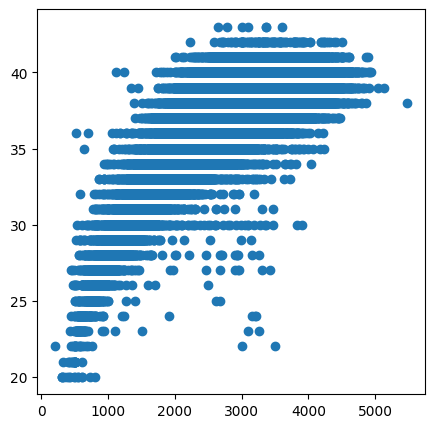

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(tabla1["peso_nac"], tabla1["t_ges"])
plt.show()

Seleccionamos los datos de entrenamiento y de prueba. El criterio corresponde a seleccionar el 30% de los datos para prueba de manera aleatoria

In [18]:
from sklearn.model_selection import train_test_split # Acá vamos a seleccionar los datos de entrenamiento y de prueba
x_train, x_test, y_train, y_test, z_train, z_test= train_test_split(tabla1["peso_nac"], tabla1["t_ges"], tabla1["edad_madre"], test_size = 0.3)
 # Escogemos el 30% de los datos para prueba
print(x_train, y_train, z_train)
yz_train = pd.concat([y_train, z_train], axis=1)
print(yz_train)
yz_test = pd.concat([y_test, z_test], axis=1)


41717     3050
72689     3310
151632    2540
44973     3920
178841    3280
          ... 
41734     2360
87722     3242
270       2670
167895    3120
46391     3431
Name: peso_nac, Length: 137613, dtype: int64 41717     39
72689     39
151632    35
44973     39
178841    41
          ..
41734     36
87722     40
270       36
167895    40
46391     38
Name: t_ges, Length: 137613, dtype: int64 41717     25
72689     21
151632    22
44973     27
178841    19
          ..
41734     20
87722     33
270       29
167895    31
46391     35
Name: edad_madre, Length: 137613, dtype: int64
        t_ges  edad_madre
41717      39          25
72689      39          21
151632     35          22
44973      39          27
178841     41          19
...       ...         ...
41734      36          20
87722      40          33
270        36          29
167895     40          31
46391      38          35

[137613 rows x 2 columns]


Ahora entrenamos el modelo con los datos de entrenamiento escogidos. Se utiliza el modelo de regresión lineal. En este caso dado por:

$$Peso_{nacido} = \beta_1 tiempo_{gestación}+ \beta_2 edad_{madre} + \epsilon$$


In [19]:

import numpy as np
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(yz_train, x_train)

LinearRegression()

In [20]:
print("El intersecto del modelo es: ", modelo.intercept_)
print("coeficiente:", list(zip(yz_train, modelo.coef_.flatten(), )))

El intersecto del modelo es:  -3935.7050016314106
coeficiente: [('t_ges', 179.38250833818321), ('edad_madre', 4.965388367432553)]


También podemos determinar las medidas de ajuste sobre el parámetro.

El peso del recién nacido: -3945.821+ 179.85 (Tiempo de gestación) + 4.702 (Edad de madre)

In [22]:
print("coeficiente de determinación:", modelo.score(yz_test, x_test))

coeficiente de determinación: 0.46364253355254736


calcular el cuadrado medio del error

In [23]:
from sklearn.metrics import mean_squared_error
predicciones = modelo.predict(yz_test)
print(predicciones)
rmse = mean_squared_error(y_true  = x_test, y_pred  = predicciones, squared = True)
print("El cuadrado medio del error es: ", rmse)

[3199.24369785 2975.1726942  3438.21086659 ... 3224.07063968 2790.8247975
 3004.96502441]
El cuadrado medio del error es:  134280.56171498392


In [24]:
modelo.predict(yz_train)

array([3184.34753274, 3164.48597927, 2451.92133429, ..., 2666.0615612 ,
       3393.52237129, 3054.61890808])

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = tabla1[["t_ges", "edad_madre"]]
Y = tabla1["peso_nac"]
X_train, X_test, Y_train, Y_test = train_test_split(
                                        X,
                                        Y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [27]:
X_train = sm.add_constant(X_train, prepend=True)
modelo1 = sm.OLS(endog=Y_train, exog=X_train,)
modelo1 = modelo1.fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                 6.738e+04
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        11:50:27   Log-Likelihood:            -1.1509e+06
No. Observations:              157272   AIC:                         2.302e+06
Df Residuals:                  157269   BIC:                         2.302e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3954.6892     19.293   -204.980      0.0

In [28]:
intervalos_ci = modelo1.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,-3992.503115,-3916.875316
t_ges,178.948814,180.872819
edad_madre,4.633959,5.191182


A continuación se presenta el diagrama de dispersión junto con el plano de regresión. Obsérvese que a medida que aumenta el tiempo de gestación y en menor medida la edad de la madre, aumenta el peso del recién nacido. Se muestra los datos de entrenamiento (azul) y los de prueba (púrpura). Nótese que es similar el ajuste para ambos tipos de datos

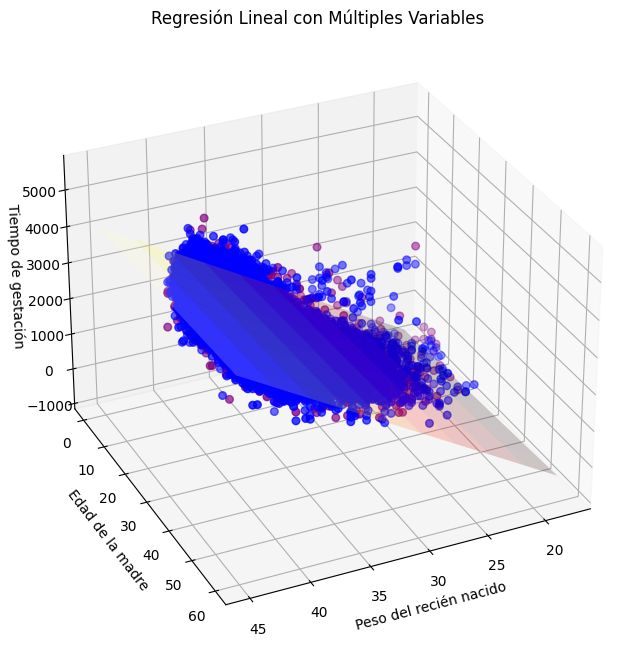

In [29]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sb
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(18, 45, num=10), np.linspace(0, 60, num=10))
nuevoX = (modelo.coef_[0] * xx)
nuevoY = (modelo.coef_[1] * yy)

x = (nuevoX + nuevoY + modelo.intercept_)
ax.plot_surface(xx, yy, x, alpha=0.2, cmap='hot')
ax.scatter(yz_train["t_ges"], yz_train["edad_madre"], x_train, c='blue',s=30)
ax.scatter(yz_test["t_ges"], yz_test["edad_madre"], x_test, c='purple',s=30)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Peso del recién nacido')
ax.set_ylabel('Edad de la madre')
ax.set_zlabel('Tiempo de gestación')
ax.set_title('Regresión Lineal con Múltiples Variables')

plt.show()

Evaluamos ahora qué tan bueno es el ajuste del modelo para nuestros datos. Para ello calculamos el coeficiente de determinación para los datos de prueba. El coeficiente de casi 0.46 indica que hay un bajo ajuste de los datos al modelo propuesto, por lo que debería tomarse otro modelo

In [30]:
yz_test = pd.concat([y_test, z_test], axis=1)
r2 = modelo.score(yz_test, x_test)
r2

0.46364253355254736